# Проект "Прогнозирование успеваемости детей по математике"

__Суть проекта__ — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, 
чтобы на ранней стадии выявлять студентов, находящихся в группе риска.


In [68]:
# Импортируем нужные библиотеки

from itertools import combinations

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_ind

pd.set_option("display.max_rows", 100)  # показывать больше строк
pd.set_option("display.max_columns", 50)  # показывать больше колонок

In [69]:
# предобработка


"""Рисование boxplot-ов"""
def get_boxplot(dframe, column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y="score", data=dframe, ax=ax)
    plt.xticks(rotation=45)
    ax.set_title("Boxplot для столбца " + column)
    plt.show()


"""Удаление выбросов"""
def outliers_delete(column, category):
    perc25 = stud[stud[column] == category].score.quantile(0.25)
    perc75 = stud[stud[column] == category].score.quantile(0.75)
    IQR = perc75 - perc25
    stud[stud[column] == category] = stud[
        (stud[column] == category)
        & stud.score.between(perc25 - 1.5 * IQR, perc75 + 1.5 * IQR)
    ]


"""Набор функций для оценки столбца: просмотр значений, количество NULL, построение диаграммы boxplot"""
def gentleman_func_set(column):
    print("Количество уникальных значений:", stud[column].nunique())
    print("Количество пустых значений:", stud[column].isnull().sum())
    print(stud[column].value_counts())
    get_boxplot(stud, column)


"""Расчет статистически значимых различий значений в столбце score для разных значений в выбранной колонке"""
def get_stat_dif(column):
    cols = stud.loc[:, column].value_counts().index[:20]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        # если хотя бы для одной комбинации значений в выбранной колонке Тест Стьюдента говорит о том, что средние значения оценок различаются,
        # то мы делаем вывод, что этот столбец можно использовать для модели
        if ttest_ind(
            stud.loc[stud.loc[:, column] == comb[0], "score"],
            stud.loc[stud.loc[:, column] == comb[1], "score"],
        ).pvalue <= 0.05 / len(
            combinations_all
        ):  # Учли поправку Бонферони. Для снижения шанса отклонить неверные гипотезы.
            print("Найдены статистически значимые различия для колонки", column)
            break

In [70]:
# открываем файл

stud = pd.read_csv("stud_math.csv")
display(stud.head(10))
stud.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

************************************************

## Первые выводы по таблице-источнику данных:
1. Во многих столбцах есть NaN (null) значения. Нужно будет решить, что с ними делать - удалять или заполнять.
2. Всего в таблице 395 строк.
3. Есть непонятный столбец "studytime, granular". Он не описан в описании полей в задании на проект.

***
# Первичная обработка данных

In [71]:
# переименовываем столбцы с большими буквами F и M, а также "studytime, granular" заменяем на "studytime_g"
stud.columns = [
    "school",
    "sex",
    "age",
    "address",
    "famsize",
    "p_status",
    "m_edu",
    "f_edu",
    "m_job",
    "f_job",
    "reason",
    "guardian",
    "traveltime",
    "studytime",
    "failures",
    "schoolsup",
    "famsup",
    "paid",
    "activities",
    "nursery",
    "studytime_g",
    "higher",
    "internet",
    "romantic",
    "famrel",
    "freetime",
    "goout",
    "health",
    "absences",
    "score",
]
display(stud.head(10))

,school,sex,age,address,famsize,p_status,m_edu,f_edu,m_job,f_job,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_g,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


***
## 1 school школы

Количество уникальных значений: 2
Количество пустых значений: 0
GP    349
MS     46
Name: school, dtype: int64


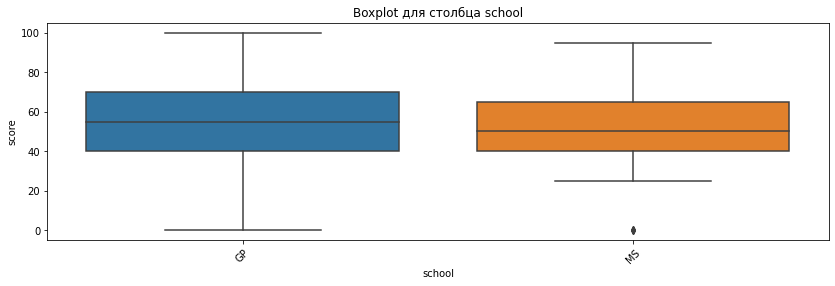

In [72]:
gentleman_func_set("school")

__Ученики учатся всего в двух школах, причем в школе MS их в 7 раз меньше, чем в школе GP.
В поле school нет пустых значений.__

__Оценки учеников в школе GP хотя и немного лучше, но не существенно. Но столбец остается, т.к. он может влиять на будущую модель__


***
## 2 score Оценки

In [73]:
stud.score

0      30.0
1      30.0
2      50.0
3      75.0
4      50.0
       ... 
390    45.0
391    80.0
392    35.0
393    50.0
394    45.0
Name: score, Length: 395, dtype: float64


 Метрики столбца score


count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64


 Количество различных оценок


0.0      37
20.0      1
25.0      7
30.0     15
35.0      9
40.0     31
45.0     27
50.0     54
55.0     46
60.0     31
65.0     31
70.0     27
75.0     33
80.0     16
85.0      6
90.0     12
95.0      5
100.0     1
Name: score, dtype: int64


 Гистограмма столбца score


<AxesSubplot:>

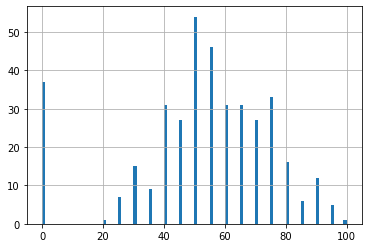

In [74]:
print("\n Метрики столбца score")
display(stud.score.describe())

print("\n Количество различных оценок")
display(stud.score.value_counts().sort_index())

print("\n Гистограмма столбца score")
stud.score.hist(bins=100)

__Распределение показывает, что использовалась 100-бальная система оценки.
Предположительно, есть выброс по нулевым оценкам. Их 37 штук.
Посмотрим на учеников с нулевыми оценками...__

In [75]:
stud[stud.score == 0]

,school,sex,age,address,famsize,p_status,m_edu,f_edu,m_job,f_job,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_g,higher,internet,romantic,famrel,freetime,goout,health,absences,score
128,GP,M,18,R,NaN,T,2.0,2.0,NaN,other,reputation,mother,1.0,1.0,2.0,no,yes,no,yes,yes,-3.0,yes,yes,no,3.0,3.0,3.0,4.0,0.0,0.0
130,GP,F,15,R,GT3,T,3.0,4.0,services,teacher,course,father,2.0,3.0,2.0,no,yes,no,no,yes,-9.0,yes,yes,yes,4.0,2.0,2.0,5.0,0.0,0.0
131,GP,F,15,U,GT3,NaN,1.0,1.0,at_home,other,course,mother,3.0,1.0,0.0,no,yes,no,yes,no,-3.0,yes,yes,yes,4.0,NaN,3.0,4.0,0.0,0.0
134,GP,M,15,R,GT3,T,3.0,4.0,at_home,teacher,course,mother,NaN,2.0,0.0,no,yes,no,no,yes,-6.0,yes,no,yes,5.0,3.0,3.0,5.0,0.0,0.0
135,GP,F,15,U,GT3,T,4.0,4.0,services,NaN,course,mother,1.0,3.0,0.0,no,yes,no,yes,yes,-9.0,yes,yes,yes,4.0,3.0,3.0,5.0,0.0,0.0
136,GP,M,17,R,GT3,T,3.0,4.0,at_home,other,course,mother,3.0,2.0,0.0,no,no,NaN,no,yes,-6.0,yes,no,no,NaN,4.0,5.0,5.0,0.0,0.0
137,GP,F,16,U,GT3,A,3.0,NaN,other,other,NaN,other,NaN,1.0,2.0,no,yes,no,yes,no,-3.0,yes,yes,yes,4.0,3.0,2.0,5.0,0.0,0.0
140,GP,M,15,U,GT3,T,4.0,3.0,teacher,services,NaN,father,2.0,4.0,0.0,yes,yes,no,NaN,yes,-12.0,yes,yes,no,2.0,2.0,2.0,3.0,0.0,0.0
144,GP,M,17,U,GT3,T,2.0,1.0,other,other,home,NaN,1.0,1.0,3.0,no,yes,no,no,yes,-3.0,yes,yes,no,5.0,4.0,5.0,5.0,0.0,0.0
146,GP,F,15,U,GT3,T,3.0,2.0,health,services,home,father,1.0,2.0,3.0,no,NaN,no,no,yes,-6.0,yes,yes,no,3.0,3.0,2.0,3.0,0.0,0.0


__Нулевые оценки - это, скорей всего, ошибочные данные, т.к. получить ноль по гос.экзамену, скорей всего, невозможно.
Тем более что эти дети не пропустили ни одного занятия. И строки с ними визуально мало чем отличаются от других детей по значениям других признаков.
Удалим из таблицы нулевые оценки и посмотрим на данные еще раз.__


 Метрики столбца score


count    352.000000
mean      57.755682
std       16.200928
min       20.000000
25%       45.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64


 Количество различных оценок


20.0      1
25.0      7
30.0     15
35.0      9
40.0     31
45.0     27
50.0     54
55.0     46
60.0     31
65.0     31
70.0     27
75.0     33
80.0     16
85.0      6
90.0     12
95.0      5
100.0     1
Name: score, dtype: int64


 Гистограмма столбца score


<AxesSubplot:>

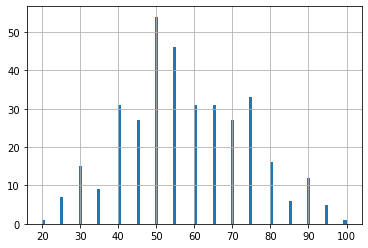

In [76]:
stud = stud.loc[stud.score != 0]
print("\n Метрики столбца score")
display(stud.score.describe())

print("\n Количество различных оценок")
display(stud.score.value_counts().sort_index())

print("\n Гистограмма столбца score")
stud.score.hist(bins=100)

__стандартное отклонение уменьшилось, что означает, что разброс средних значений стал меньше, т.е. данные стали плотнее вокруг среднего__

25-й перцентиль: 45.0, 75-й перцентиль: 70.0, IQR: 25.0,  Границы выбросов: [7.5, 107.5].


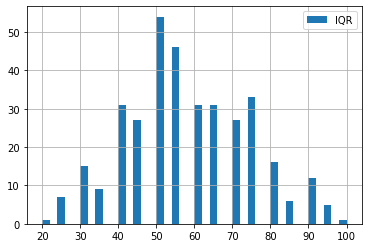

In [77]:
# считаем выбросы оценок и смотрим их на гистограмме, но не удаляем выбросы из таблицы.

perc25 = stud.score.quantile(0.25)
perc75 = stud.score.quantile(0.75)
IQR = perc75 - perc25

print(
    "25-й перцентиль: {},".format(perc25),
    "75-й перцентиль: {},".format(perc75),
    "IQR: {}, ".format(IQR),
    "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5 * IQR, l=perc75 + 1.5 * IQR),
)

stud.score.loc[stud.score.between(perc25 - 1.5 * IQR, perc75 + 1.5 * IQR)].hist(
    bins=40, range=(20, 100), label="IQR"
)

plt.legend();

__Теперь в даных по оценкам нет выбросов.
А распределение оценок похоже на нормальное
Посмотрим на корреляцию оценок с другими числовыми признаками__


In [78]:
stud.corr()

,age,m_edu,f_edu,traveltime,studytime,failures,studytime_g,famrel,freetime,goout,health,absences,score
age,1.000000,-0.141398,-0.128343,0.104216,-0.008716,0.262303,0.008716,0.083318,0.019367,0.139860,-0.053792,0.108507,-0.131542
m_edu,-0.141398,1.000000,0.253011,-0.174105,0.068027,-0.215006,-0.068027,-0.012861,0.007068,0.070731,-0.034891,-0.024321,0.186477
f_edu,-0.128343,0.253011,1.000000,0.033026,0.046579,-0.143204,-0.046579,0.044080,-0.075707,-0.030944,0.028293,0.001427,0.069842
traveltime,0.104216,-0.174105,0.033026,1.000000,-0.097440,0.107639,0.097440,-0.012472,-0.018409,0.035267,-0.010930,-0.047761,-0.075516
studytime,-0.008716,0.068027,0.046579,-0.097440,1.000000,-0.152980,-1.000000,0.063252,-0.125352,-0.027164,-0.086351,-0.031132,0.142055
failures,0.262303,-0.215006,-0.143204,0.107639,-0.152980,1.000000,0.152980,0.002970,0.133837,0.142730,0.057055,0.087122,-0.289377
studytime_g,0.008716,-0.068027,-0.046579,0.097440,-1.000000,0.152980,1.000000,-0.063252,0.125352,0.027164,0.086351,0.031132,-0.142055
famrel,0.083318,-0.012861,0.044080,-0.012472,0.063252,0.002970,-0.063252,1.000000,0.163971,0.056368,0.093502,-0.089903,0.046717
freetime,0.019367,0.007068,-0.075707,-0.018409,-0.125352,0.133837,0.125352,0.163971,1.000000,0.296358,0.069779,0.005969,-0.012457
goout,0.139860,0.070731,-0.030944,0.035267,-0.027164,0.142730,0.027164,0.056368,0.296358,1.000000,-0.007655,-0.051667,-0.182286


__age: Возраст влияет на оценку отрицательно. Чем больше возраст, тем ниже оценка.__

__m_edu: Образование матери влияет на оценку положительно, чем оно выше, тем выше оценка. Также наблюдается корреляция между m_edu и f_edu. Поэтому столбец f_edu потенциально можно было бы исключить из рассмотрения.__

__studytime: Время на учебу помимо школы влияет на оценку положительно, чем оно больше, тем выше оценка.__

__studytime_g: он и studytime имеют коэффициент корреляции -1. Значит от столбца studytime_g можно избавиться, т.к. он является зеркальным отображением столбца studytime__

__failures: Количество внеучебных неудач сильно влияет на оценку отрицательным образом.__

__goout: Проведение времени с друзьями отрицательно влияет на оценку.__

__Остальные числовые атрибуты ученика влияют на оценку незначительно, т.к. не превышают значения 0.1 .__

In [79]:
# удаляем столбец studytime_g
stud.drop("studytime_g", axis=1, inplace=True)

***
## 3 sex Пол 

Количество уникальных значений: 2
Количество пустых значений: 0
F    186
M    172
Name: sex, dtype: int64


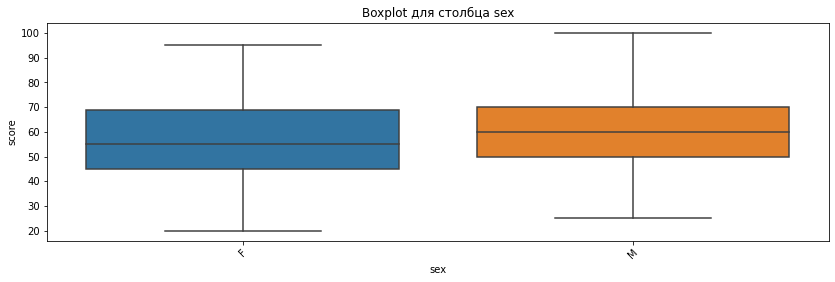

In [80]:
gentleman_func_set("sex")

__В столбце нет пропусков.__

__Медианная оценка у мальчиков и девочек одинаковая. Но в целом мальчики получают более высокие оценки, чем девочки. Столбец не удаляем, т.к. пол все же влияет на оценку__

## 4 age Возраст

Количество уникальных значений: 8
Количество пустых значений: 0
16    97
17    90
15    76
18    71
19    19
20     3
21     1
22     1
Name: age, dtype: int64


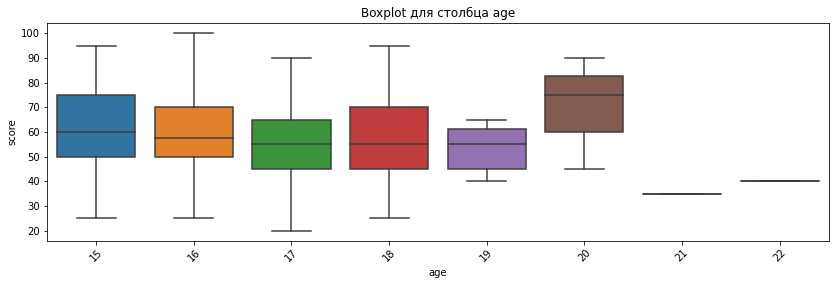

In [81]:
gentleman_func_set("age")

__Для возрастов 20, 21, 22 слишком мало наблюдений, поэтому мы эти данные удаляем.__

In [82]:
stud = stud[stud.age < 20]

## 5 address Тип адреса

In [83]:
# заменяем буквы U и R на "Город" и "За городом"
stud.address = stud.address.apply(
    lambda x: "Город" if x == "U" else "За городом" if x == "R" else "NaN"
)

Количество уникальных значений: 3
Количество пустых значений: 0
Город         266
За городом     72
NaN            15
Name: address, dtype: int64


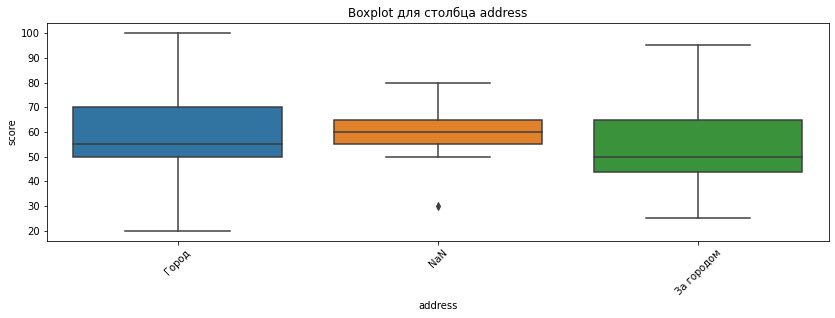

In [84]:
gentleman_func_set("address")

__Медианные оценки для городских и загородных учеников одинаковые. Но у городских учеников в целом оценки выше, хотя и минимальные оценки у них ниже.__
__Принять решение об удалении пустых значений можно будет потом, при проработке модели. Сейчас удалять их не нужно, т.к. они, возможно, содержат значения, заполненные в других столбцах, которые сильно повлияют на модель__ 

## 6 famsize Размер семьи

In [85]:
# заменяем обозначения размеров семьи на более понятные русские слова
stud.famsize = stud.famsize.apply(
    lambda x: "Меньше или равно 3-м человекам"
    if x == "LE3"
    else "Больше 3-х человек"
    if x == "GT3"
    else "NaN"
)

In [86]:
# проверим, есть ли какая-то зависимость между столбцами famsize и p_status
print(stud.groupby(by=["famsize"])["p_status"].value_counts())
# Получается, что большинство семей, живущих вместе, имеют больше 3-х человек.
# Но, достоверно заполнить поле famsize на основе этой информации невозможно. Поэтому оставляем пустые значения незаполненными.


famsize                         p_status
NaN                             T            17
                                A             3
Больше 3-х человек              T           188
                                A            17
Меньше или равно 3-м человекам  T            75
                                A            12
Name: p_status, dtype: int64


Количество уникальных значений: 3
Количество пустых значений: 0
Больше 3-х человек                230
Меньше или равно 3-м человекам     99
NaN                                24
Name: famsize, dtype: int64


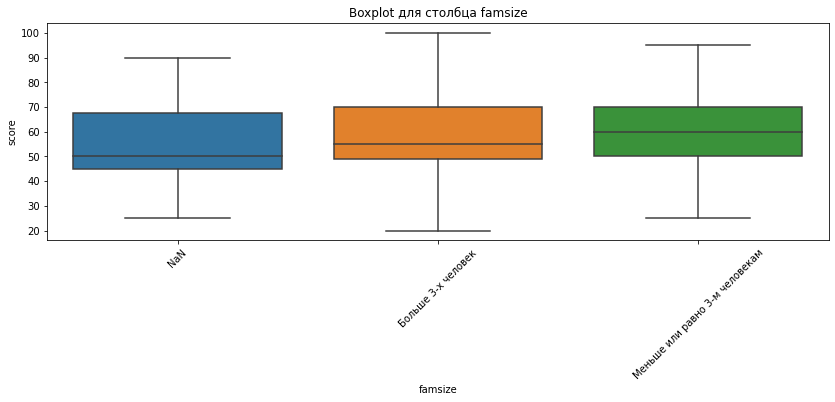

In [87]:
gentleman_func_set("famsize")

__В семьях, где больше 3-х человек, медианная оценка ниже, т.е. детям в таких семьях тяжелей учиться__

__Оставляем столбец__

## 7 p_status Живет ли семья вместе

In [20]:
stud.p_status = stud.p_status.apply(
    lambda x: "Живут вместе" if x == "T" else "Живут раздельно" if x == "A" else "NaN"
)

Количество уникальных значений: 3
Количество пустых значений: 0
Живут вместе       280
NaN                 41
Живут раздельно     32
Name: p_status, dtype: int64


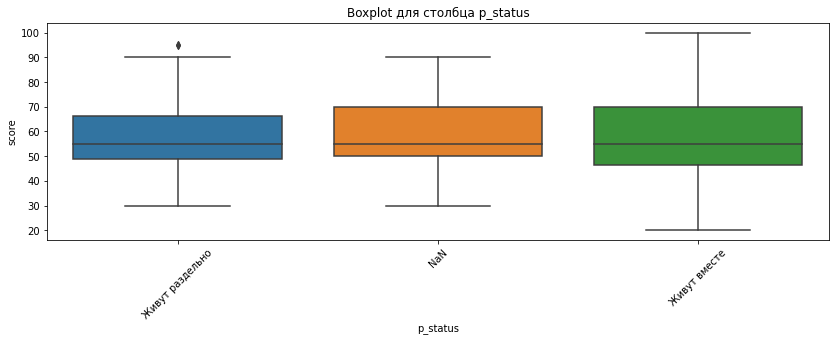

In [21]:
gentleman_func_set("p_status")

__незаполненных значений довольно много (41 строка), но удалять их не нужно, т.к. эти строки могут содержать важные значения для других полей__

__учитывая одинаковость медиан для всех вариантов значений в этом столбце, его можно удалить из рассмотрения__

In [22]:
stud.drop("p_status", axis=1, inplace=True)

## 8 m_edu Образование матери

Количество уникальных значений: 5
Количество пустых значений: 4
4.0    124
3.0     86
2.0     85
1.0     49
0.0      3
Name: m_edu, dtype: int64


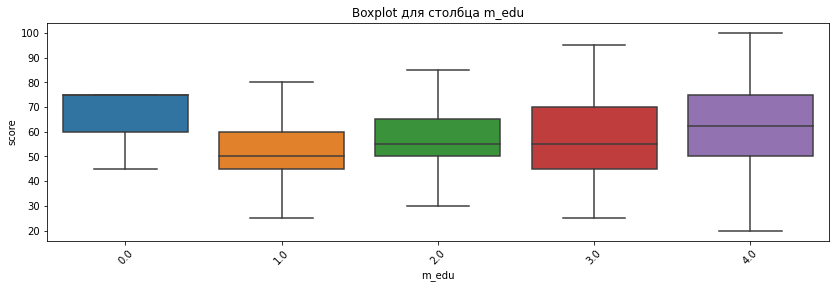

In [89]:
gentleman_func_set("m_edu")

__как мы выяснили ранее при построении корреляционной матрицы, образование матери положительно влияет на оценку ребенка, причем отсутствие образования тоже влияет положительно__

__нулевых значений крайне мало - их всего 3 штуки. можно удалить, а можно не трогать, и посмотреть их еще раз при построении модели__

__заменять числовые значения на категории не считаю нужным, т.к. зависимость оценок от глубины образования матери все же есть__

__пустые значения удаляем__

__есть выбросы для значения 2.0. удаляем их__


In [88]:
stud = stud[stud.m_edu.isnull() == False]
outliers_delete("m_edu", 2)

## 9 f_edu Образование отца

Количество уникальных значений: 6
Количество пустых значений: 24
2.0     92
3.0     89
4.0     80
1.0     63
0.0      2
40.0     1
Name: f_edu, dtype: int64


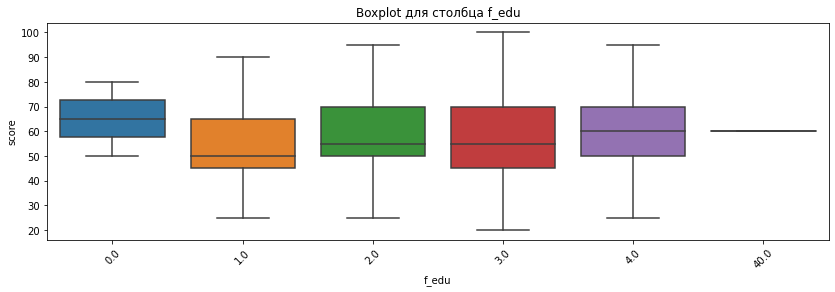

In [90]:
gentleman_func_set("f_edu")

__Есть одно некорректное значение 40. Скорей всего это значение 4.0. Произведем его замену.__

__В остальном, образование отца также влияет на оценки, причем отсутствие образования также влияет__

__Заменять числовые значения на категории не считаю нужным, т.к. зависимость оценок от глубины образования отца все же есть__

__Пустые значения здесь для эксперимента заменим на число 5.__

Количество уникальных значений: 6
Количество пустых значений: 0
2.0    92
3.0    90
4.0    81
1.0    65
5.0    21
0.0     2
Name: f_edu, dtype: int64


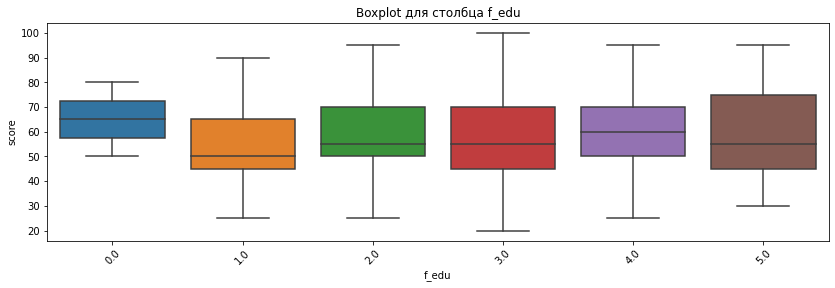

In [26]:
stud.f_edu = stud.f_edu.apply(lambda x: 4 if x == 40 else x)
stud.f_edu = stud.f_edu.apply(lambda x: 5 if pd.isnull(x) else x)

gentleman_func_set("f_edu")

__замена пустых значений на число 5 ничего в итоге не дала, т.к. эти значения имеют разброс оценок, включающий все категории__

__поэтому далее пустые значения не будем заменять__

## 10 m_job Работа матери

Количество уникальных значений: 5
Количество пустых значений: 21
other       116
services     86
teacher      51
at_home      48
health       29
Name: m_job, dtype: int64


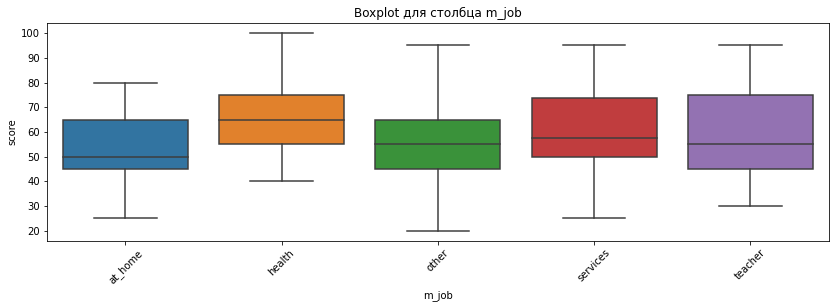

In [91]:
gentleman_func_set("m_job")

__С этим столбцом ничего не делаем, выбросов нет, ошибок нет. данные чистые. в разных категориях оценки разные__

__Есть пустые значения, их можно приравнять к "other", но лучше этого сейчас не делать, т.к. это может повлиять на качество модели__

__удалять пустые значения тоже не нужно, т.к. их много и они могут сильно уменьшить рассматриваемый массив данных__

## 11 f_job Работа отца 

Количество уникальных значений: 5
Количество пустых значений: 45
other       163
services     89
teacher      26
health       15
at_home      13
Name: f_job, dtype: int64


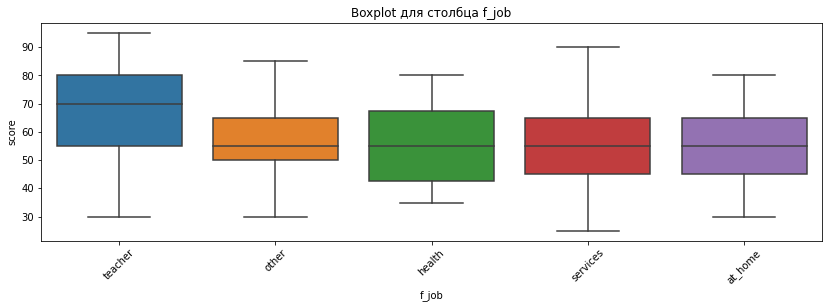

In [94]:
gentleman_func_set("f_job")

In [93]:
# есть выбросы в категории "other". удалим их

outliers_delete("f_job", "other")



__Удалили выбросы в столбце__

__Есть пустые значения, их можно приравнять к "other", но лучше этого сейчас не делать, т.к. это может повлиять на качество модели__

__удалять пустые значения тоже не нужно, т.к. их много и они могут сильно уменьшить рассматриваемый массив данных__

## 12 reason Причина выбора школы

Количество уникальных значений: 4
Количество пустых значений: 28
course        112
reputation     92
home           88
other          31
Name: reason, dtype: int64


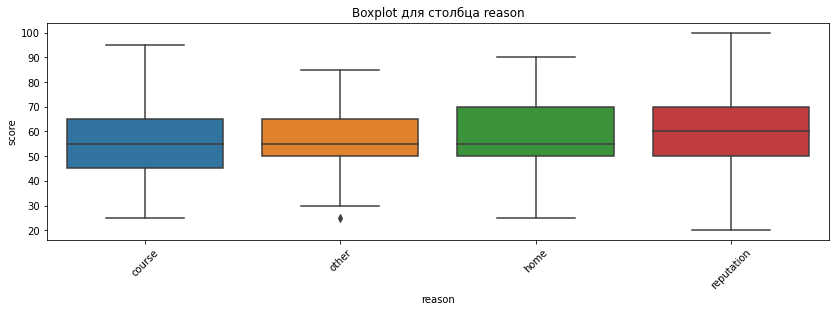

In [95]:
gentleman_func_set("reason")

__столбец можно удалить из таблицы, т.к. ящики с усами для разных категорий данных в нем похожи.__

In [96]:
stud.drop("reason", axis=1, inplace=True)

## 13 guardian Опекун

Количество уникальных значений: 3
Количество пустых значений: 39
mother    214
father     76
other      22
Name: guardian, dtype: int64


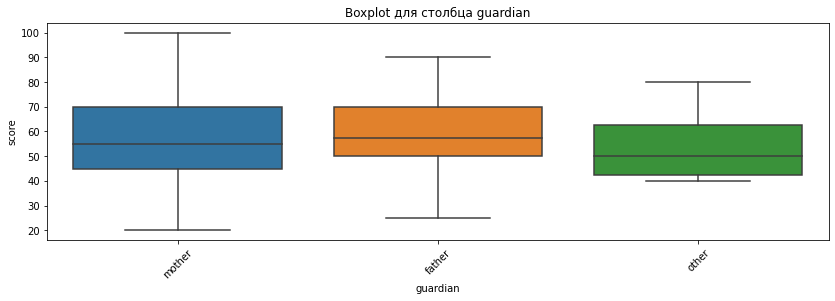

In [97]:
gentleman_func_set("guardian")

__столбец можно удалить из таблицы, т.к. ящики с усами для разных категорий данных в нем похожи.__

In [98]:
stud.drop("guardian", axis=1, inplace=True)

## 14 traveltime  Время до школы

Количество уникальных значений: 4
Количество пустых значений: 35
1.0    208
2.0     84
3.0     17
4.0      7
Name: traveltime, dtype: int64


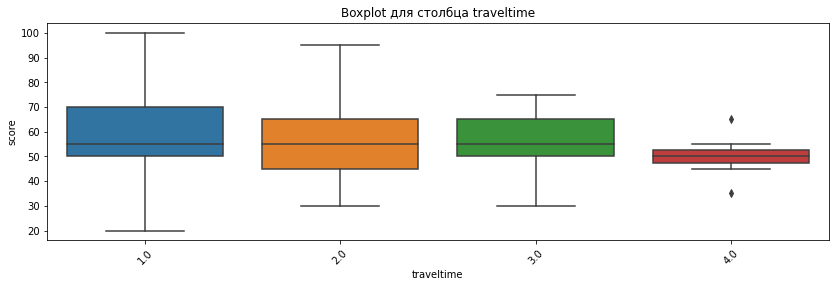

In [99]:
gentleman_func_set("traveltime")

__столбец можно удалить из таблицы, т.к. ящики с усами для разных категорий данных в нем похожи.__

In [35]:
stud.drop("traveltime", axis=1, inplace=True)

## 15 studytime Время на учебу помимо школы

Количество уникальных значений: 4
Количество пустых значений: 19
2.0    169
1.0     84
3.0     56
4.0     23
Name: studytime, dtype: int64


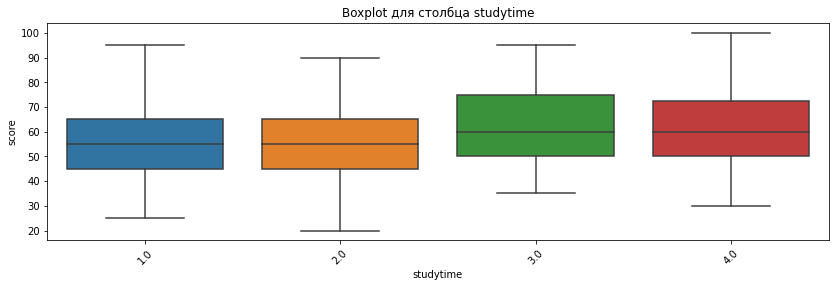

In [100]:
gentleman_func_set("studytime")

__столбец оставляем, т.к. есть небольшая закономерность по увеличению оценки в зависимости от увеличения времени на учебу помимо школы.__

## 16 failures Количество внеучебных неудач

Количество уникальных значений: 4
Количество пустых значений: 31
0.0    263
1.0     39
2.0      9
3.0      9
Name: failures, dtype: int64


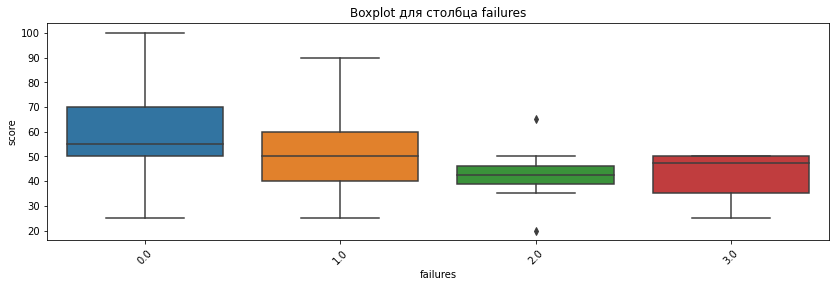

In [37]:
gentleman_func_set("failures")

__столбец оставляем, т.к. есть небольшая закономерность по увеличению оценки в зависимости от уменьшения количества внеучебных неудач.__

## 17 schoolsup Дополнительная образовательная поддержка

Количество уникальных значений: 2
Количество пустых значений: 20
no     285
yes     46
Name: schoolsup, dtype: int64


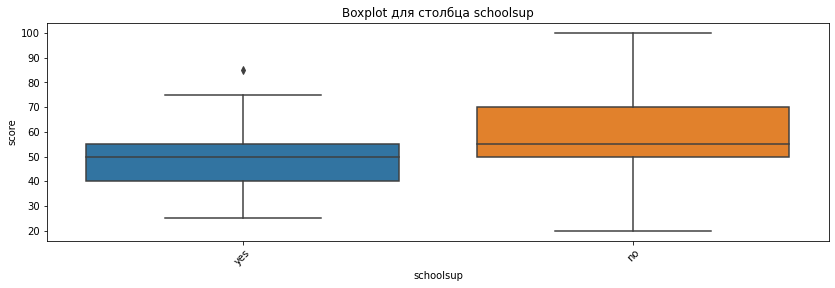

In [101]:
gentleman_func_set("schoolsup")

__Очень странный столбец. Если дополнительной образовательной поддержки не было, то оценки выше. Возможно, в нем была ошибка при заполнении.__

__Но, в любом случае, столбец влияет на оценку, поэтому его оставляем__

__Удаляем выбросы для категории yes. Пустые значения не удаляем, т.к. их много и они могут содержать важные данные в других столбцах__

In [39]:
outliers_delete("schoolsup", "yes")

## 18 famsup Семейная образовательная поддержка

Количество уникальных значений: 2
Количество пустых значений: 49
yes    186
no     116
Name: famsup, dtype: int64


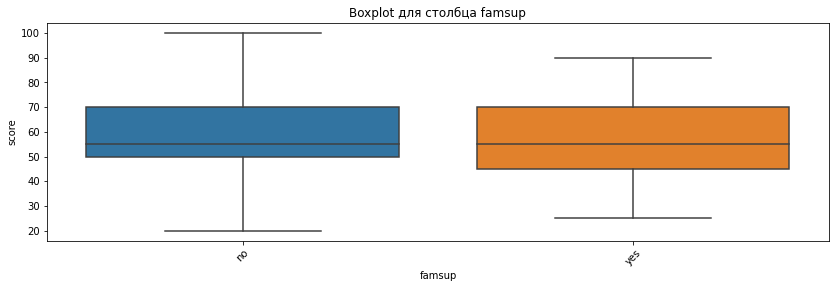

In [102]:
gentleman_func_set("famsup")

__столбец можно удалить из таблицы, т.к. ящики с усами для разных категорий данных в нем похожи.__

In [41]:
stud.drop("famsup", axis=1, inplace=True)

## 19 paid Дополнительные платные занятия по математике

Количество уникальных значений: 2
Количество пустых значений: 48
no     163
yes    140
Name: paid, dtype: int64


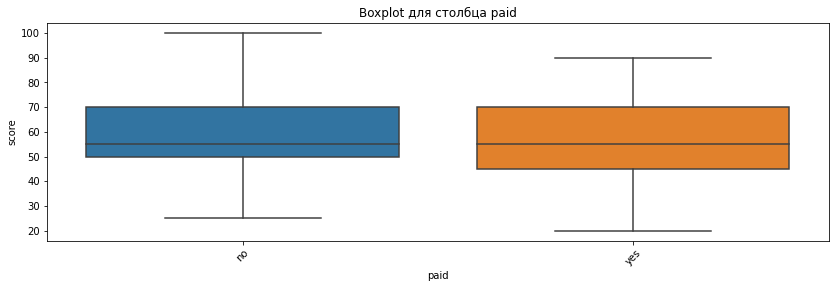

In [103]:
gentleman_func_set("paid")

__столбец можно удалить из таблицы, т.к. ящики с усами для разных категорий данных в нем похожи.__

In [43]:
stud.drop("paid", axis=1, inplace=True)

## 20 activities — дополнительные внеучебные занятия

Количество уникальных значений: 2
Количество пустых значений: 25
yes    169
no     157
Name: activities, dtype: int64


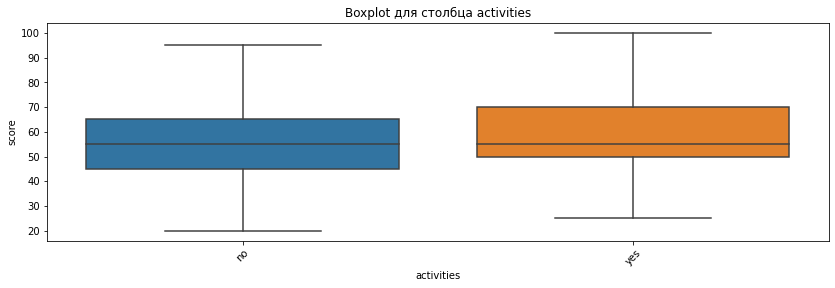

In [104]:
gentleman_func_set("activities")

__столбец можно удалить из таблицы, т.к. медианы одинаковые, а верхние и нижние квартили отличаются несущественно.__

In [45]:
stud.drop("activities", axis=1, inplace=True)

## 21 nursery — посещал детский сад

Количество уникальных значений: 2
Количество пустых значений: 26
yes    260
no      65
Name: nursery, dtype: int64


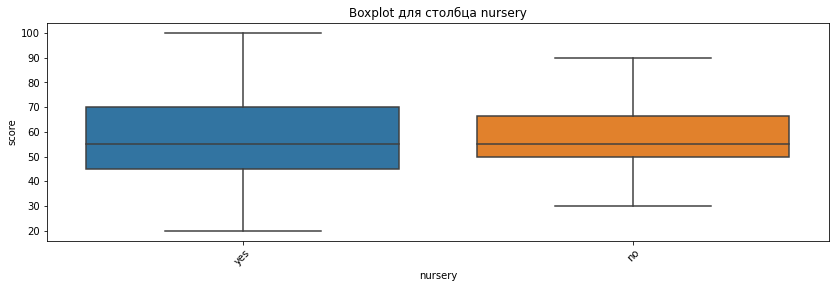

In [105]:
gentleman_func_set("nursery")

__столбец можно удалить из таблицы, т.к. ящики с усами для разных категорий данных в нем похожи.__

In [47]:
stud.drop("nursery", axis=1, inplace=True)

## 22 higher — хочет получить высшее образование

Количество уникальных значений: 2
Количество пустых значений: 31
yes    308
no      12
Name: higher, dtype: int64


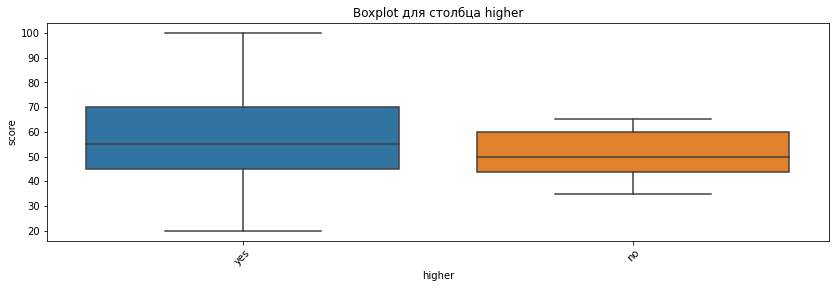

In [106]:
gentleman_func_set("higher")

__столбец можно оставить, т.к. прослеживается влияние желания ученика получить высшее образование на его оценки.__

## 23 internet — наличие интернета дома

Количество уникальных значений: 2
Количество пустых значений: 42
yes    265
no      44
Name: internet, dtype: int64


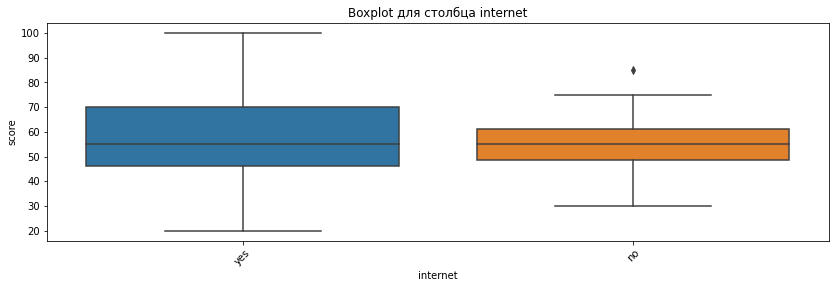

In [107]:
gentleman_func_set("internet")

__столбец можно удалить из таблицы, т.к. ящики с усами для разных категорий данных в нем похожи.__

In [50]:
stud.drop("internet", axis=1, inplace=True)

## 24 romantic — в романтических отношениях

Количество уникальных значений: 2
Количество пустых значений: 41
no     210
yes    100
Name: romantic, dtype: int64


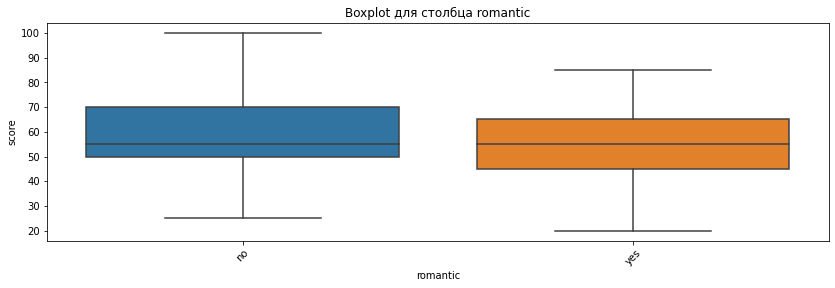

In [108]:
gentleman_func_set("romantic")

__столбец можно удалить из таблицы, т.к. медианы одинаковые, а квартили отличаются несущественно.__

In [52]:
stud.drop("romantic", axis=1, inplace=True)

## 25 famrel — семейные отношения

Количество уникальных значений: 6
Количество пустых значений: 35
 4.0    161
 5.0     83
 3.0     52
 2.0     13
 1.0      6
-1.0      1
Name: famrel, dtype: int64


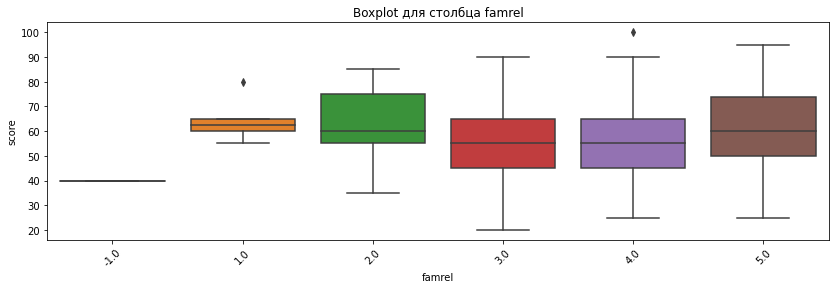

In [109]:
gentleman_func_set("famrel")

__столбец можно удалить из таблицы, т.к. на графике не видна закономерность между оценками и улучшением семейных отношений.__

In [54]:
stud.drop("famrel", axis=1, inplace=True)

## 26 freetime — свободное время после школы

Количество уникальных значений: 5
Количество пустых значений: 21
3.0    128
4.0     99
2.0     58
5.0     31
1.0     14
Name: freetime, dtype: int64


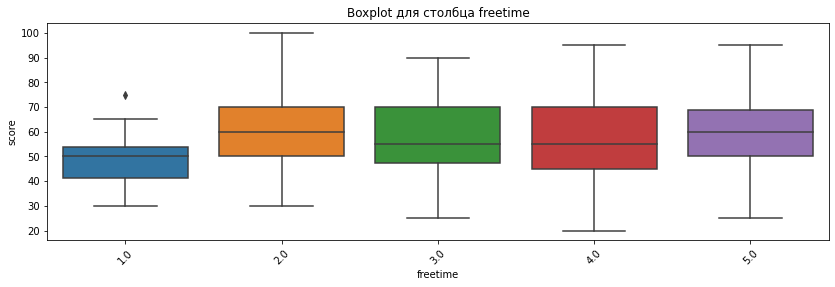

In [110]:
gentleman_func_set("freetime")

In [56]:
# удаляем выброс с категории 1
outliers_delete("freetime", 1.0)

__столбец можно было бы удалить, если бы не сильное влияние на оценку минимального количества свободного времени. Этот факт можно будет использовать в модели, поэтому столбец я не удаляю. И выброс тоже не хотел бы сейчас удалять, т.к. фактов для этой категории и так очень мало.__

## 27 goout — проведение времени с друзьями

Количество уникальных значений: 5
Количество пустых значений: 19
3.0    112
2.0     87
4.0     72
5.0     42
1.0     19
Name: goout, dtype: int64


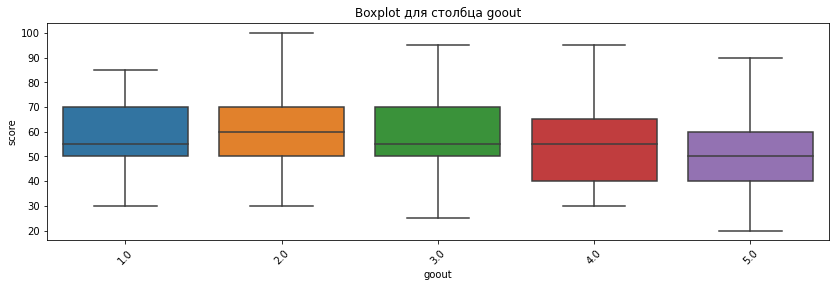

In [111]:
gentleman_func_set("goout")

__Здесь явно прослеживается снижение оценок при увеличении количества времени с друзьями. Столбец оставляем. С пустыми значениями ничего не делаем, причины оставления пустых значений я описывал выше.__

## 28 health — текущее состояние здоровья

Количество уникальных значений: 5
Количество пустых значений: 27
5.0    122
3.0     75
4.0     52
1.0     41
2.0     34
Name: health, dtype: int64


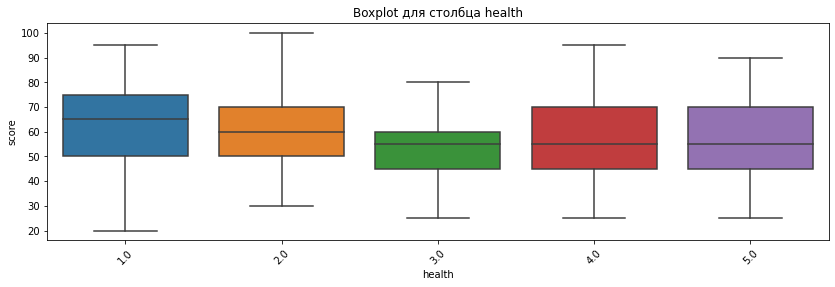

In [115]:
gentleman_func_set("health")

__Есть небольшая зависимость между плохим здоровьем и хорошими оценками. Столбец оставляем.__
__выброс в категории 3 удаляем__

In [114]:
outliers_delete("health", 3.0)

## 26 absences — количество пропущенных занятий

Количество уникальных значений: 33
Количество пустых значений: 25
0.0     70
2.0     59
4.0     49
6.0     28
8.0     20
10.0    16
14.0    12
12.0    11
3.0      7
7.0      6
16.0     6
18.0     5
5.0      5
20.0     4
9.0      3
1.0      3
22.0     3
13.0     2
15.0     2
11.0     2
25.0     1
56.0     1
24.0     1
23.0     1
19.0     1
17.0     1
75.0     1
26.0     1
30.0     1
40.0     1
28.0     1
38.0     1
54.0     1
Name: absences, dtype: int64


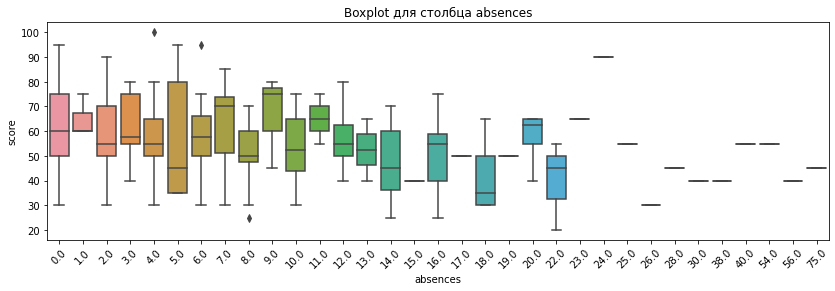

In [60]:
gentleman_func_set("absences")

Количество уникальных значений: 3
Количество пустых значений: 0
5-10            163
1-5             118
Не пропускал     70
Name: absences_range, dtype: int64


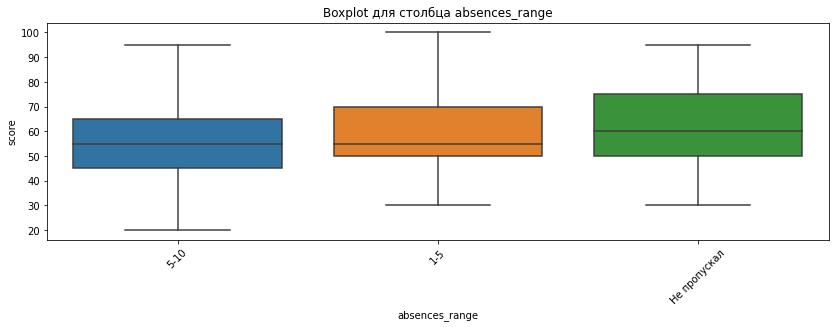

In [61]:
# уникальных значений очень много. поэтому сделаем три интервала значений и посмотрим, как по ним распределяются оценки.

stud["absences_range"] = stud.absences

stud.absences_range = stud.absences_range.apply(
    lambda x: "Не пропускал"
    if x == 0
    else "1-5"
    if 0 < x < 5
    else "5-10"
    if 5 <= 10
    else "10+"
)

gentleman_func_set("absences_range")

__ящики с усами показывают, что количество пропусков не влияет на оценку. Но, если пропусков не было ни одного - то оценка будет явно больше, чем если бы был хотя бы один пропуск__

__столбец оставляем, он может влиять на модель__

__Итоговый набор данных для построения модели смотрите ниже__

In [62]:
display(stud)

,school,sex,age,address,famsize,m_edu,f_edu,m_job,f_job,studytime,failures,schoolsup,higher,freetime,goout,health,absences,score,absences_range
0,GP,F,18.0,Город,NaN,4.0,4.0,at_home,teacher,2.0,0.0,yes,yes,3.0,4.0,3.0,6.0,30.0,5-10
1,GP,F,17.0,Город,Больше 3-х человек,1.0,1.0,at_home,other,2.0,0.0,no,yes,3.0,3.0,3.0,4.0,30.0,1-5
2,GP,F,15.0,Город,Меньше или равно 3-м человекам,1.0,1.0,at_home,other,2.0,3.0,yes,yes,3.0,2.0,3.0,10.0,50.0,5-10
3,GP,F,15.0,Город,Больше 3-х человек,4.0,2.0,health,NaN,3.0,0.0,no,yes,2.0,2.0,5.0,2.0,75.0,1-5
4,GP,F,16.0,Город,Больше 3-х человек,3.0,3.0,other,other,2.0,0.0,no,yes,3.0,2.0,5.0,4.0,50.0,1-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,MS,F,18.0,За городом,Больше 3-х человек,4.0,4.0,teacher,at_home,1.0,0.0,no,yes,4.0,3.0,5.0,7.0,30.0,5-10
388,MS,F,18.0,Город,Меньше или равно 3-м человекам,3.0,1.0,teacher,services,2.0,0.0,no,yes,3.0,4.0,1.0,0.0,40.0,Не пропускал
391,MS,M,17.0,Город,Меньше или равно 3-м человекам,3.0,1.0,services,services,1.0,0.0,no,yes,4.0,5.0,2.0,3.0,80.0,1-5
393,MS,M,18.0,За городом,Меньше или равно 3-м человекам,3.0,2.0,services,other,1.0,0.0,no,yes,4.0,1.0,5.0,0.0,50.0,Не пропускал


In [66]:
# Посчитаем статистические различия оценок для нечисловых признаков учеников
# Нулевая гипотеза: Средние оценки для различных значений нечисловых признаков учеников неразличимы.

for col in [
    "school",
    "sex",
    "address",
    "famsize",
    "m_job",
    "f_job",
    "schoolsup",
    "higher",
    "freetime",
    "health",
    "absences",
]:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки f_job
Найдены статистически значимые различия для колонки freetime


****************
# Выводы

1. В исходной таблице находилось 395 записей.
2. В разных столбцах есть пустые значения.
3. Следующие столбцы удалены из модели:
    * studytime granular
    * p_status
    * reason
    * guardian
    * traveltime
    * famsup
    * paid
    * activities
    * nursery
    * internet
    * romantic
    * famrel
    * Это связано с тем, что при разных значениях в этих столбцах оценка ученика по математике изменялась несущественно.
    * А столбец studytime granular полностью коррелируется со значениями в столбце studytime, поэтому он лишний в этой таблице.

4. Оценки учеников выставлены в 100-бальной системе. Среди оценок были пустые и нулевые значения. Они были удалены из таблицы, так как пустые и ошибочные оценки не могут быть использованы в модели.
5. Распределение оценок похоже на нормальное.
6. Построенная матрица корреляции показала, что следующие цифровые столбцы существенно влияют на оценку (коэффициент корреляции больше, чем 0.1):
	* age: Возраст влияет на оценку отрицательно. Чем больше возраст, тем ниже оценка.

	* m_edu: Образование матери влияет на оценку положительно, чем оно выше, тем выше оценка.

	* studytime: Время на учебу помимо школы влияет на оценку положительно, чем оно больше, тем выше оценка.

	* failures: Количество внеучебных неудач сильно влияет на оценку отрицательным образом.

	* goout: Проведение времени с друзьями отрицательно влияет на оценку.
7. Следующие нецифровые столбцы в той или иной мере влияют на значение оценки, если оценивать влияние визуально по диаграммам boxplot.
    * "school",
    * "sex",
    * "address",
    * "famsize",
    * "m_job",
    * "f_job",
    * "schoolsup",
    * "higher",
    * "freetime",
    * "health",
    * "absences"
8. Столбцы f_job и freetime имеют статистические значимое влияние на оценку по математике. Можно было бы оставить в моделе только эти два нецифровых столбца, а также цифровые столбцы из пункта 6, но я бы принимал это решение уже при построении модели.